# Customer reviews of Germanwings airline

Case study from #ZeroG

### Why reviews

- Search engines like unique content that is regularly updated, and user reviews are a great way to attract more content, hence more visitors. 
- Reviews produce an average 18% uplift in sales (Reevoo); 63% of customers are more likely to make a purchase from a site which has user reviews. (iPerceptions, 2011).
- Consumer reviews are significantly more trusted (nearly 12 times more) than descriptions that come from the company.
- Reviews/feedbacks help the companies improve their customer service.

<br>
<br>
Ref: https://econsultancy.com/blog/9366-ecommerce-consumer-reviews-why-you-need-them-and-how-to-use-them


### How to improve

from insight of the data.


- data collections and cleaning
- data analysis
- feature engineering and modeling

Tools: Python - Jupyter notebook, Numpy, Pandas, Scikit-learn etc.

In [470]:
# import modules

import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from __future__ import print_function 

plt.style.use("ggplot")

color_list = list(plt.rcParams['axes.prop_cycle'])
colors = [color_list[i]['color'] for i in range(len(color_list))]

## Data cleaning
### Original data - a sample item

In [9]:
file = open("4U_Reviews.txt", "r")
data = file.readlines()
data[:14]

['"they have been unresponsive"\r\n',
 'Brian McNamee (Canada) 16th October 2015\r\n',
 '2\r\n',
 'We flew with Germanwings (or tried to) on September 30th. After two lengthy delays passengers were notified that the flight was cancelled and to return to the check-in counter for further information. After waiting at the counter for another 30 minutes or so, staff began issuing refunds or providing alternate travel options to passengers. By this point it was quite late in the evening with limited options (plus we were 5+ hours after planned departure). We managed to get a voucher with 3 other passenger to get a flight from Stuttgart to Zurich with an ongoing connection to Amsterdam (flights were with Swiss). We made the flight and the connector (which was held back waiting for about 70 of us) however luggage did not make it. Short of this is the airline was ill-prepared to manage this. They offered little information or options to passengers. since returning home I have been attempting t

In [471]:
# parse data
def find_between(s, first, last):
    try:
        start = s.index(first) + len(first)
        end = s.index(last, start)
        return s[start:end]
    except ValueError:
        return None
    
def find_before(s, last):
    try:
        end = s.index(last)
        return s[:end]
    except ValueError:
        return None

def find_extract(lst, target):
    try:
        for s in lst:
            if target in s:
                return find_between(s, '\t', '\r')    
    except ValueError:
        return None

    
content = []
sub_cont = []
count = 0
for i in data:
    sub_cont.append(i)
    if i == '\r\n':
        content.append(sub_cont)
        sub_cont = []
        count += 1

whole = dict()
whole["Title"] = [find_before(content[i][0], "\r\n") for i in range(count)]
whole["Title"] = [None if w == "Germanwings customer review" else w for w in whole["Title"]]
name_nationality_time = [content[i][1] for i in range(count)]
whole["Name"] = [' '.join(i.split()[:2]) for i in name_nationality_time]
whole["Nationality"] = [find_between(i, '(', ')') for i in name_nationality_time]
whole["Rating"] = [content[i][2].split()[0] for i in range(count)]
whole["Rating"] = [None if w == "na" else w for w in whole["Rating"]]
whole["Comments"] = [content[i][3] for i in range(count)]
whole["Recommend"] = [find_between(content[i][-2], '\t', '\r') for i in range(count)]
whole["Cabin Flown"] = [find_extract(content[i], "Cabin Flown") for i in range(count)]
whole["Type Of Traveller"] = [find_extract(content[i], "Type Of Traveller") for i in range(count)]
whole["Route"] = [find_extract(content[i], "Route") for i in range(count)]

df = pd.DataFrame(whole)
df.to_csv("data.csv")

### Structured data

In [939]:
cols = ['Name', 'Nationality', 'Cabin Flown', 'Route', 'Type Of Traveller', 'Title', 'Comments', 'Rating', 'Recommend']
df[cols].head()

,Name,Nationality,Cabin Flown,Route,Type Of Traveller,Title,Comments,Rating,Recommend
0,Brian McNamee,Canada,Economy,Stuttgart to Amsterdam,Couple Leisure,"""they have been unresponsive""",We flew with Germanwings (or tried to) on Sept...,2,no
1,L Mouratidou,United Kingdom,Economy,Hamburg to London,Solo Leisure,"""I was refused some water""",I am less than impressed with Germanwings serv...,3,no
2,H Mutschler,Germany,Economy,PMI to CGN,Couple Leisure,"""the service crew were friendly but nothing more""",Flew from Palma de Mallorca to Cologne with Ge...,3,no
3,Oliver Numrich,Germany,None,Berlin-Tegel to London Heathrow,Business,"""no problems or delays, very friendly staff""",Good flight from Berlin-Tegel to London Heathr...,10,yes
4,Andreas Huettenhoelscher,Germany,Economy,CGN to LHR,Business,"""I don't get why Germanwings is always late""",I don't get why Germanwings is always late and...,4,no


In [944]:
print("No. samples:", df.count()[2])

No. samples: 127


## Data analysis
### The missing values

In [781]:
data_null = dict()
for column in df.columns:
    n_nulls = df[column].isnull().sum()
    data_null[column] = [n_nulls, n_nulls*1.0/127]

df_null = pd.DataFrame(data_null, index=['number of NaN', 'rate of NaN']).T.sort_values("number of NaN")
df_null

,number of NaN,rate of NaN
Comments,0.0,0.000000
Name,0.0,0.000000
Recommend,0.0,0.000000
Nationality,12.0,0.094488
Cabin Flown,13.0,0.102362
Rating,13.0,0.102362
Route,113.0,0.889764
Type Of Traveller,113.0,0.889764
Title,118.0,0.929134


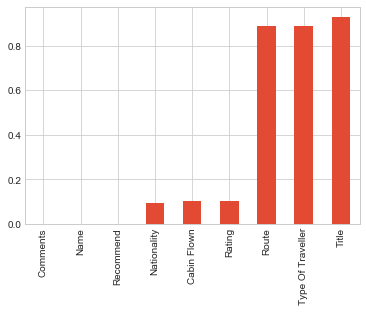

In [786]:
df_null["rate of NaN"].plot(kind="bar", color=colors[0])
plt.show()

### Nationality

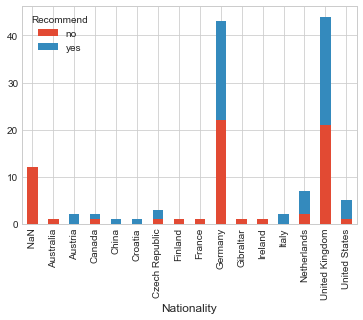

In [787]:
nationality = df[["Nationality", "Recommend"]].fillna(' NaN').groupby(["Nationality"])["Recommend"].value_counts().unstack()
nationality.plot(kind='bar', stacked=True)
plt.show()

### Cabin Flown

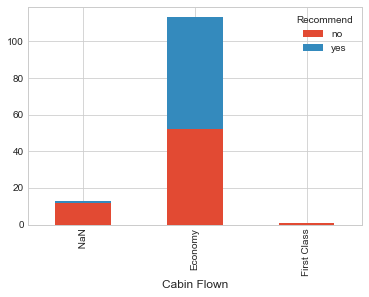

In [790]:
cabin = df[["Cabin Flown", "Recommend"]].fillna(' NaN').groupby(["Cabin Flown"])["Recommend"].value_counts().unstack()
cabin.plot(kind='bar', stacked=True)
plt.show()

### Rating

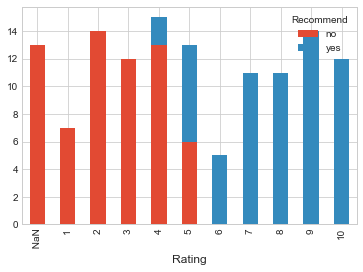

In [788]:
rate = df[["Rating", "Recommend"]].fillna(' NaN').groupby(["Rating"])["Recommend"].value_counts().unstack()
c = [' NaN', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
rate.reindex(c).plot(kind='bar', stacked=True)
plt.show()

### Recommendation

no     65
yes    62
Name: Recommend, dtype: int64


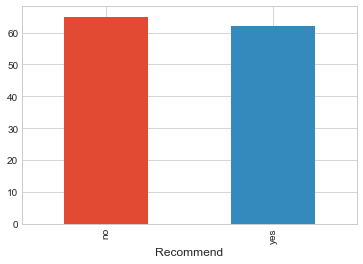

In [791]:
recommend = df["Recommend"].value_counts()
print(recommend)
recommend.plot(kind='bar')
plt.xlabel("Recommend")
plt.show()

### Summary

- 127 samples in total.
- Most of the customers are from Germany and United Kingdom.
- Many missing data: improve data collection process.
- Equal positive and negative recommendations: improve the services according to the negative complaints.
- Balenced data for machine learning application.

## Modeling

Sentiment analysis <br>
Quickly detect negative comments and make quick response, so as to improve the customer service.

Inputs: Comments <br>
Outputs: Recommendation (Yes or No)

<br>
<br>
<br>
Ref: https://blog.insightsatlas.com/7-benefits-of-sentiment-analysis-you-cant-overlook

In [946]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectPercentile, f_classif, chi2
from sklearn.metrics import confusion_matrix
import itertools

### data pre-processing


In [947]:
# split the samples into training and testing sets
X = df["Comments"]
y = df["Recommend"]
catelog = df["Recommend"].unique()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, stratify=y)

print("No. train-test samples:", y_train.shape[0], y_test.shape[0])
print("Train samples:")
print(y_train.value_counts())

No. train-test samples: 101 26
Train samples:
no     52
yes    49
Name: Recommend, dtype: int64


### featrue engineering
Bag of words:
- <b>Counting:</b> the occurrences of words in each document.
- <b>Tf-idf (term-frequency inverse document frequency):</b> reduce the weights of more common words like (the, is, an etc.) which occurs in all document

Ref: http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

In [948]:
# text vectorization
vectorizer = TfidfVectorizer(max_df=0.9, decode_error='ignore', ngram_range=(1,2), stop_words="english")
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

print("After text vectorization,\ntraining set:", X_train_transformed.shape, 
      "\ntesting set:", X_test_transformed.shape)

After text vectorization,
training set: (101, 5894) 
testing set: (26, 5894)


Feature selection, reduce the dimension by selecting the best features based on Chi2 statistics

In [949]:
# feature selection, reduce feature dimension

def reduce_dim(X_train, X_test, y_train, percentile):
    selector = SelectPercentile(chi2, percentile=percentile)
    selector.fit(X_train, y_train)
    X_train_reduced = selector.transform(X_train).toarray()
    X_test_reduced = selector.transform(X_test).toarray()
    return X_train_reduced, X_test_reduced

X_train_reduced, X_test_reduced = reduce_dim(X_train_transformed, 
                                             X_test_transformed, 
                                             y_train, percentile=10)

print("After text reduing dimension,\ntraining set:", X_train_reduced.shape, "\ntesting set:", X_test_reduced.shape)

After text reduing dimension,
training set: (101, 590) 
testing set: (26, 590)


In [950]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.style.use('seaborn-dark')
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    thresh = cm.max() *4 / 5.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], fontsize=15,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)

### modeling - Naive Bayes

Accuracy of test set: 65.38%


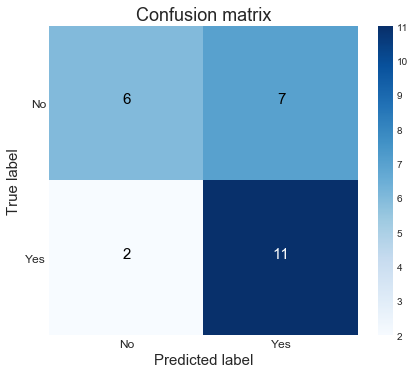

In [951]:
# model
clf = GaussianNB()
clf.fit(X_train_reduced, y_train)

print("Accuracy of test set: {:.2%}".format(clf.score(X_test_reduced, y_test)))

y_pred = clf.predict(X_test_reduced)
cm = confusion_matrix(y_test.values, y_pred)

class_names = np.array(['No', 'Yes'])
plot_confusion_matrix(cm, class_names)

### k-fold cross validation

In [952]:
## cross validation
vectorizer = TfidfVectorizer(max_df=0.9, decode_error='ignore', ngram_range=(1,2))
X_transformed = vectorizer.fit_transform(X)

kf = KFold(n_splits=10)
n = np.arange(X.shape[0])
scores = []
for train, test in kf.split(n):
    X_train, X_test, y_train, y_test = X_transformed[train], X_transformed[test], y[train], y[test]
    X_train_reduced, X_test_reduced = reduce_dim(X_train, 
                                             X_test, 
                                             y_train, percentile=20)
    
    clf = GaussianNB().fit(X_train_reduced, y_train)
    scores.append(clf.score(X_test_reduced, y_test))

print("CV results of Naive Bayes\nmean: {:.2%}".format(np.mean(scores)),
      "\nstandard deviation: {:.2%}".format(np.std(scores)))

CV results of Naive Bayes
mean: 65.90% 
standard deviation: 15.53%


### compare different models
Logistic Regression, Random Forest, Support Vector Machine and Naive Bayes.

In [953]:
## compare different models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=100, max_depth=3, random_state=99),
    LinearSVC(),
    GaussianNB(),
    LogisticRegression(random_state=99),
]

CV = 10
df_plot = pd.DataFrame(index=range(CV * len(models)))
df_mean_std = pd.DataFrame()
entries = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_transformed.toarray(), y, scoring='accuracy', cv=CV)
    df_mean_std[model_name] = accuracies
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

df_plot = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [954]:
df_mean_std.describe().iloc[1:3,:]

,RandomForestClassifier,LinearSVC,GaussianNB,LogisticRegression
mean,0.696337,0.788187,0.637454,0.774542
std,0.143044,0.221311,0.184651,0.172612


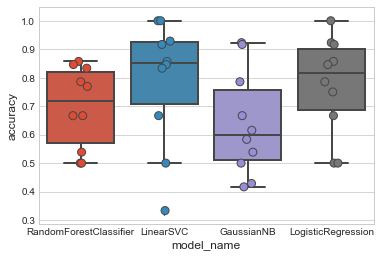

In [955]:
import seaborn as sns
sns.set_style("whitegrid")
sns.boxplot(x='model_name', y='accuracy', data=cv_df, linewidth=2)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=1)
plt.show()

## Conclusions

* Customers are not motivated to write/complete the reviews.<br>
solutions: motivate the customers, remind/persuade or give rewards.
* We have too many negative comments.<br>
* Constructed a prototype of ML application, which can be used to quickly detect the negative comments.<br>
Further improvements: 
  - collect more data
  - better feature engineering, eg. word2vec
  - improve models, eg. hyperparameter tuning
  - more sophisticated models, eg. GBT, deep learning


<br>
ref: <br>
https://machinelearningmastery.com/develop-word-embeddings-python-gensim/ <br>
http://www.wildml.com/2015/12/implementing-a-cnn-for-text-classification-in-tensorflow/


### Further study with Word embeddings

A word embedding is an approach to provide a vector representation of words that capture some informations about their meaning. The words with similar meanings are locally clustered within the embeddding space.

Ref:<br> http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/<br> https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [920]:
import nltk
import re
#nltk.download('stopwords')

STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)
        if word == "":
            sentence.remove(word)
                
    sentence = " ".join(sentence)
    return sentence

def build_corpus(data):
# Creates a list of lists containing words from each sentence"
    corpus = []
    for item in data.iteritems():
        word_list = item[1].split(" ")
        word_list = [x.replace("\r\n","") for x in word_list]
        corpus.append(word_list)
    return corpus

data = df["Comments"].apply(clean_sentence)
corpus = build_corpus(data)
print(corpus[0])

['flew', 'germanwings', 'tried', 'september', '30th', 'two', 'lengthy', 'delays', 'passengers', 'notified', 'flight', 'cancelled', 'return', 'checkin', 'counter', 'information', 'waiting', 'counter', 'another', '30', 'minutes', 'staff', 'began', 'issuing', 'refunds', 'providing', 'alternate', 'travel', 'options', 'passengers', 'point', 'quite', 'late', 'evening', 'limited', 'options', 'plus', '5', 'hours', 'planned', 'departure', 'managed', 'get', 'voucher', '3', 'passenger', 'get', 'flight', 'stuttgart', 'zurich', 'ongoing', 'connection', 'amsterdam', 'flights', 'swiss', 'made', 'flight', 'connector', 'held', 'back', 'waiting', '70', 'us', 'however', 'luggage', 'make', 'short', 'airline', 'illprepared', 'manage', 'offered', 'little', 'information', 'options', 'passengers', 'since', 'returning', 'home', 'attempting', 'contact', 'via', 'email', 'phone', 'calls', 'discuss', 'compensation', 'passenger', 'rights', 'brochure', 'unresponsive', 'good', 'way', 'run', 'business']


In [921]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

model = Word2Vec(corpus, size=100, min_count=1)
X_wv = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X_wv)

/Users/qiuruihao/miniconda2/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


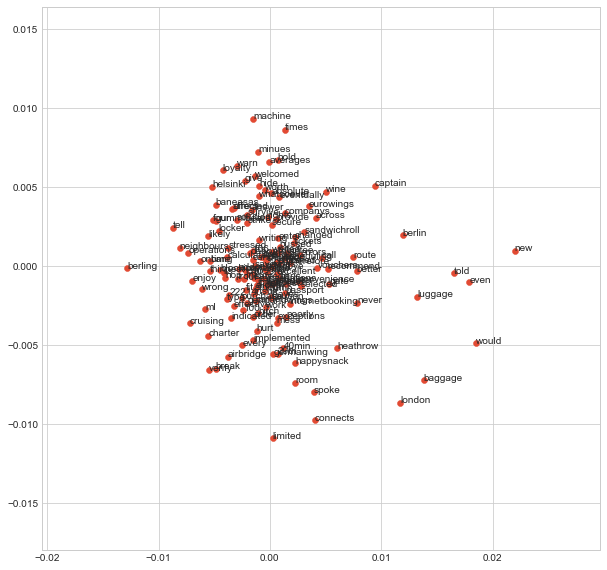

In [922]:
plt.figure(figsize=(10,10))
pyplot.scatter(result[:150, 0], result[:150, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words[:150]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

In [900]:
model.wv.most_similar('airline', topn=10)

[('flight', 0.5623059272766113),
 ('delayed', 0.49891775846481323),
 ('service', 0.492967426776886),
 ('time', 0.4848552346229553),
 ('airport', 0.47342586517333984),
 ('staff', 0.46766453981399536),
 ('flights', 0.466713011264801),
 ('germanwings', 0.4607747495174408),
 ('new', 0.45547032356262207),
 ('passengers', 0.44338297843933105)]

In [923]:
from sklearn.pipeline import Pipeline
from collections import defaultdict

## from http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])
    
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

w2v = dict(zip(model.wv.index2word, model.wv.vectors))

rf_w2v_tfidf = Pipeline([
    ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
    ("random forest", RandomForestClassifier(n_estimators=100, random_state=99))])
accuracies = cross_val_score(rf_w2v_tfidf, X, y, scoring='accuracy', cv=CV)
print(accuracies)


[0.78571429 0.42857143 0.61538462 0.53846154 0.53846154 0.58333333
 0.66666667 0.5        0.75       0.58333333]


In [924]:
df_plot = pd.DataFrame(index=range(CV * len(models)))
df_mean_std = pd.DataFrame()
entries = []

for model in models:
    model_name = model.__class__.__name__
    model_pip = Pipeline([("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
                          (model_name, model)])
    accuracies = cross_val_score(model_pip, X, y, scoring='accuracy', cv=CV)
    df_mean_std[model_name] = accuracies
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

df_plot = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

### word2vec + different models

In [925]:
df_mean_std.describe().iloc[1:3,:]

,RandomForestClassifier,LinearSVC,GaussianNB,LogisticRegression
mean,0.551374,0.511538,0.447436,0.511538
std,0.114846,0.018579,0.140684,0.018579


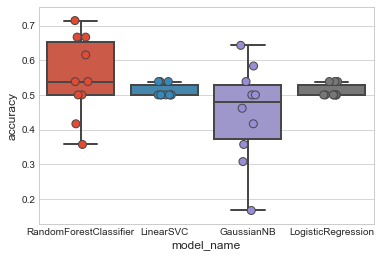

In [926]:
sns.boxplot(x='model_name', y='accuracy', data=df_plot, linewidth=2)
sns.stripplot(x='model_name', y='accuracy', data=df_plot, 
              size=8, jitter=True, edgecolor="gray", linewidth=1)
plt.show()

The word imbedding has strong dependence on the size of training set.

In [934]:
data_n = df[["Comments", "Recommend"]].groupby(["Recommend"]).get_group("no").Comments
data_n.apply(clean_sentence)
corpus_n = build_corpus(data)

/Users/qiuruihao/miniconda2/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


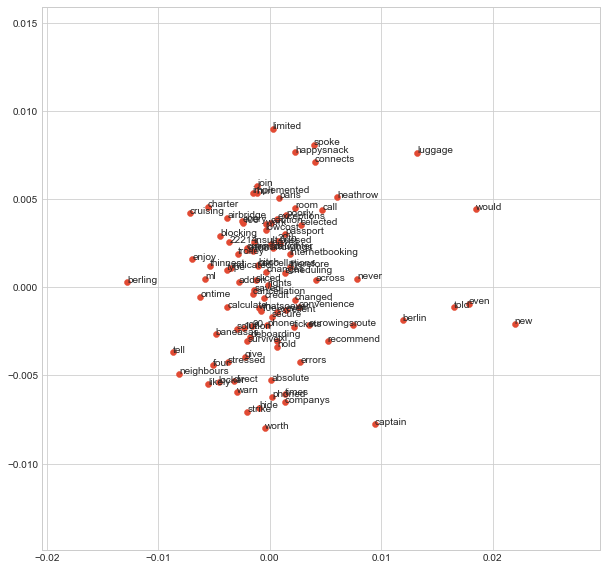

In [936]:
model = Word2Vec(corpus_n, size=100, min_count=1)
X_wv_n = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X_wv_n)

plt.figure(figsize=(10,10))
pyplot.scatter(result[:100, 0], result[:100, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words[:100]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()